In [45]:
import os
import sys
from pathlib import Path

# Get the notebook's directory
notebook_dir = os.getcwd()

# Add the notebook directory and its parent to Python path
sys.path.append(notebook_dir)
sys.path.append(str(Path(notebook_dir).parent))


# Function to add all subdirectories to Python path
def add_subdirs_to_path():
    for root, dirs, files in os.walk(notebook_dir):
        for dir_name in dirs:
            full_path = os.path.join(root, dir_name)
            if full_path not in sys.path:
                sys.path.append(full_path)


# Add all subdirectories
add_subdirs_to_path()

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import plotly.express as px

from feature_engineering import engineer_features
from utils.load_data import load_data
from data_cleaning.data_cleaning import clean_data

In [47]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

In [48]:
df = load_data("../data/train.csv")
df = engineer_features(df)
df = clean_data(df)

In [49]:
# Living Area

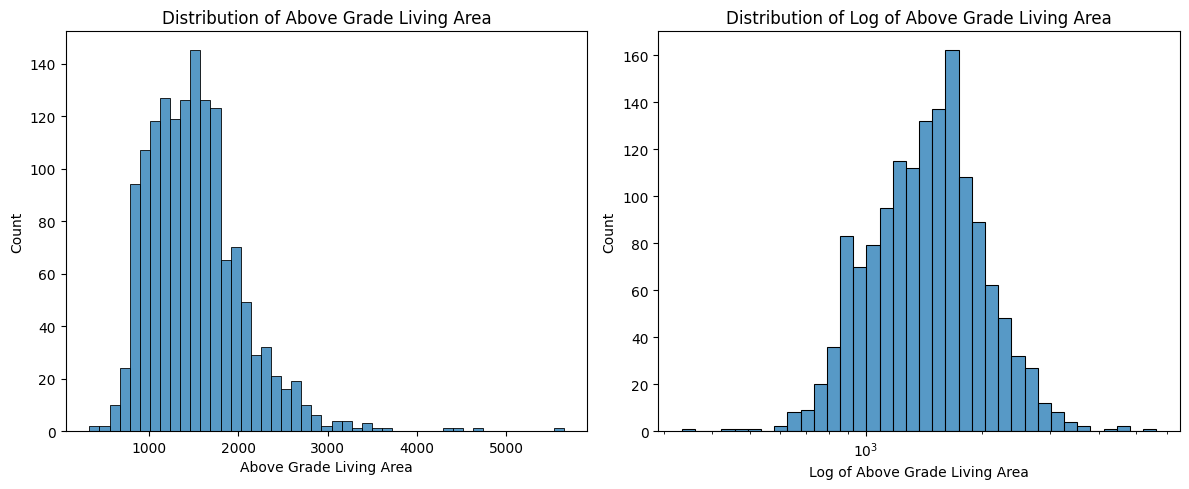

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set(xlabel="Above Grade Living Area")
ax1.set_title("Distribution of Above Grade Living Area")
sns.histplot(data=df, x="GrLivArea", ax=ax1)
# ax1.legend(title="Grouped Quality")

ax2.set(xscale="log", xlabel="Log of Above Grade Living Area")
ax2.set_title("Distribution of Log of Above Grade Living Area")
sns.histplot(data=df, x="GrLivArea", ax=ax2)
# ax2.legend(title="Grouped Condition")
plt.tight_layout()
plt.show()

In [51]:
# Log of Above Grade Living Area is likely normally distributed

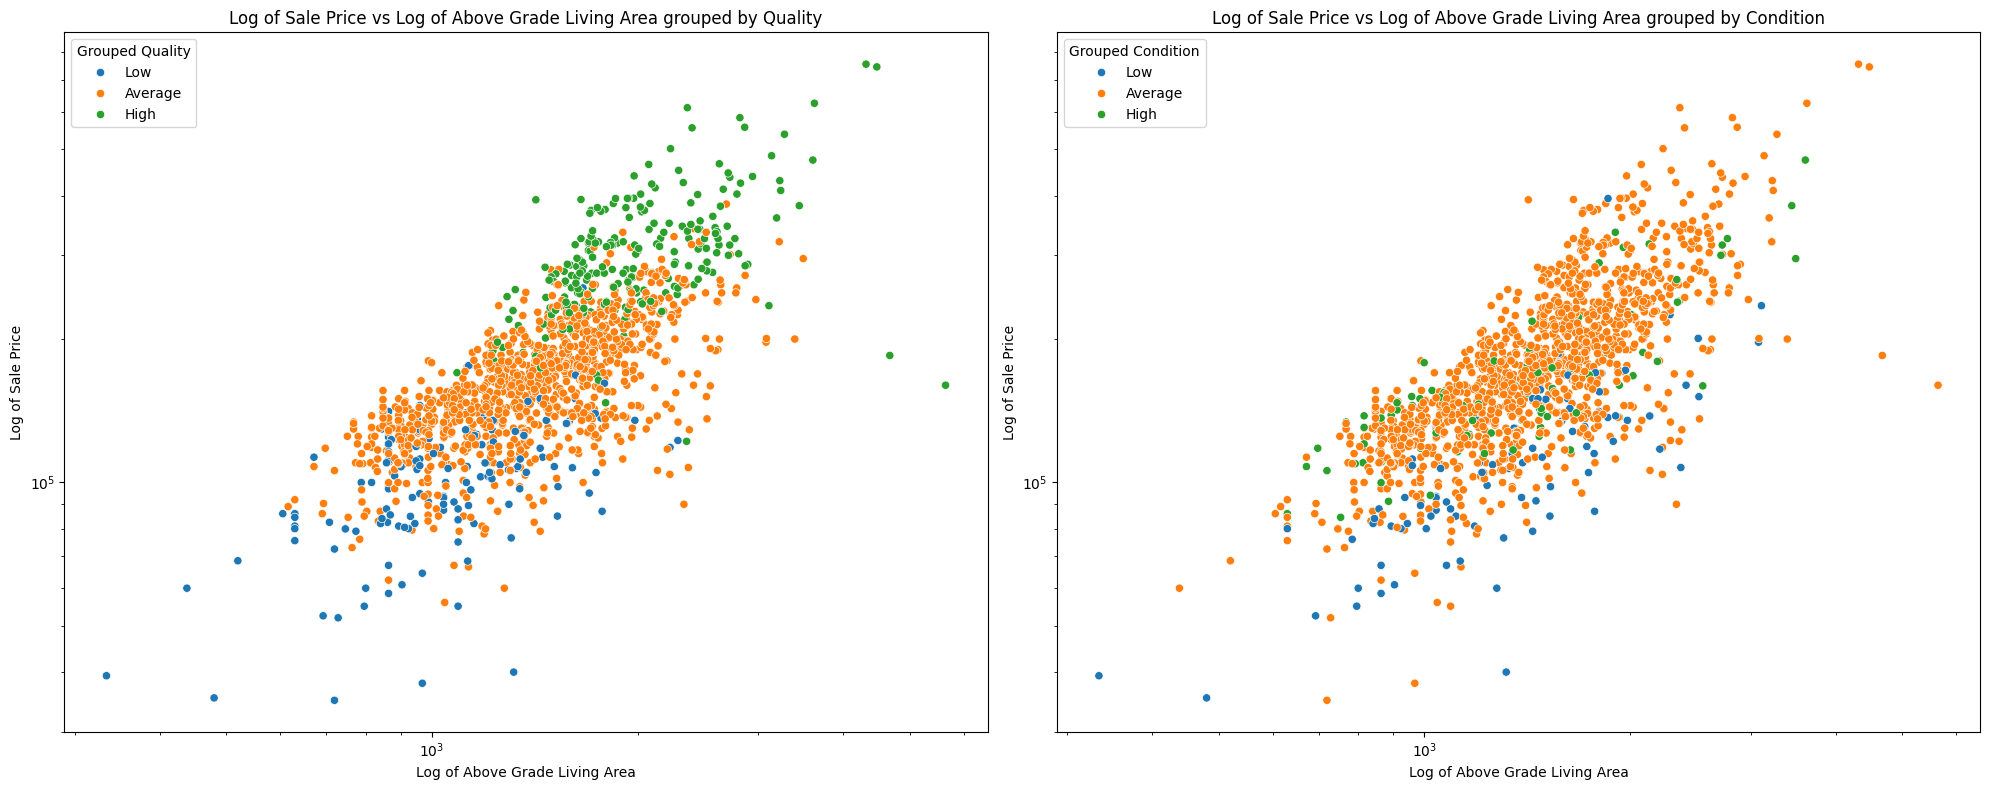

0.7302548511982289


In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set(
    xscale="log",
    yscale="log",
    xlabel="Log of Above Grade Living Area",
    ylabel="Log of Sale Price",
)
ax1.set_title("Log of Sale Price vs Log of Above Grade Living Area grouped by Quality")
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", hue="grouped_qual", ax=ax1)
ax1.legend(title="Grouped Quality")

ax2.set(
    xscale="log",
    yscale="log",
    xlabel="Log of Above Grade Living Area",
    ylabel="Log of Sale Price",
)
ax2.set_title(
    "Log of Sale Price vs Log of Above Grade Living Area grouped by Condition"
)
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", hue="grouped_cond", ax=ax2)
ax2.legend(title="Grouped Condition")
plt.tight_layout()
plt.show()

print(df["log_sale_price"].corr(np.log(df["GrLivArea"])))  # 0.7302548511982289

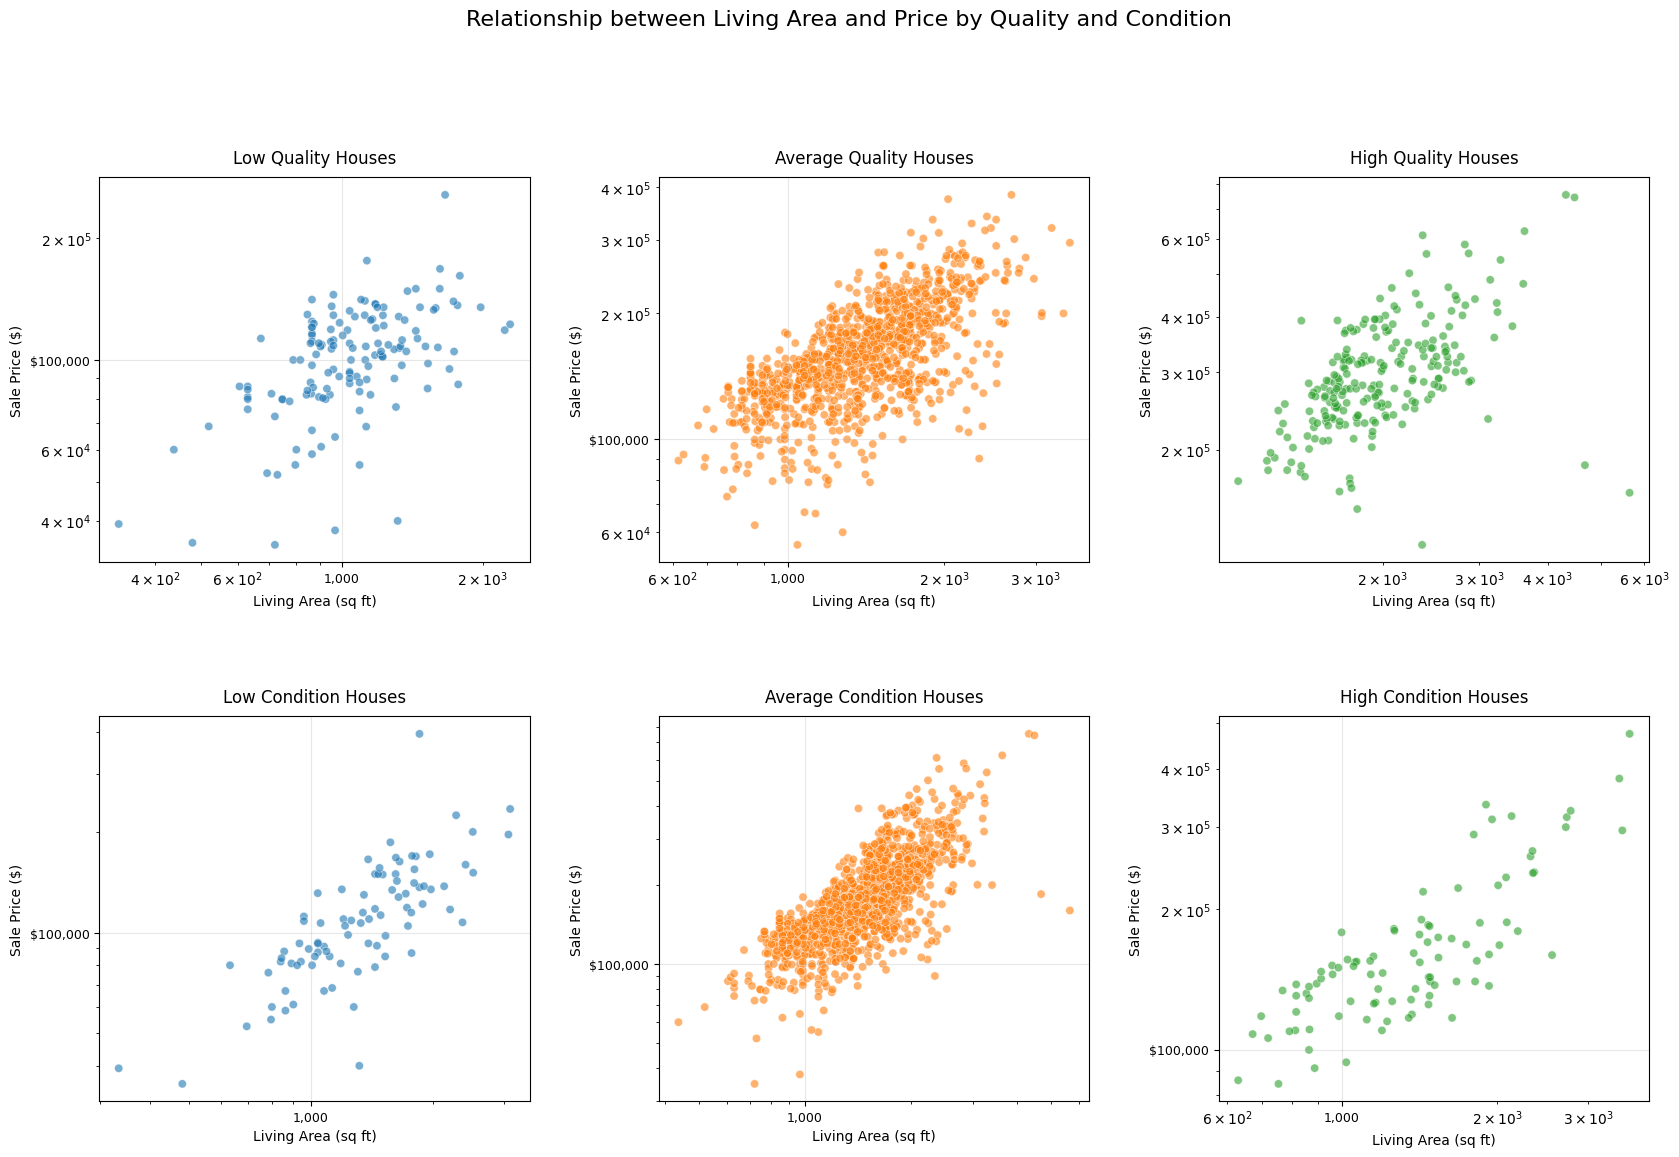

In [53]:
qual_groups = ["Low", "Average", "High"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Better color scheme

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle(
    "Relationship between Living Area and Price by Quality and Condition",
    fontsize=16,
    y=1.02,
)

# Add spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i, qual in enumerate(qual_groups):
    for row in range(2):
        ax = axes[row][i]

        # Data selection
        if row == 0:
            data = df[df["grouped_qual"].astype(str) == qual]
            title = f"{qual} Quality Houses"
            hue_var = "grouped_qual"
        else:
            data = df[df["grouped_cond"].astype(str) == qual]
            title = f"{qual} Condition Houses"
            hue_var = "grouped_cond"

        # Create scatter plot
        sns.scatterplot(
            data=data,
            x="GrLivArea",
            y="SalePrice",
            hue=hue_var,
            ax=ax,
            legend=False,
            color=colors[i],
            alpha=0.6,  # Add transparency
        )

        # Format axes
        ax.set_xscale("log")
        ax.set_yscale("log")

        # Better labels
        ax.set_xlabel("Living Area (sq ft)", fontsize=10)
        ax.set_ylabel("Sale Price ($)", fontsize=10)

        # Format title
        ax.set_title(title, fontsize=12, pad=10)

        # Format tick labels
        ax.tick_params(labelsize=9)

        # Format price ticks to show actual values
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"${int(x):,}"))
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{int(x):,}"))

        # Add grid for better readability
        ax.grid(True, alpha=0.3)

plt.show()

In [54]:
# Log of Above Grade Living Area and Log of Sale Price are strongly correlated, with clear quality clustering.
# Maybe I should use inetraction between area and quality group.

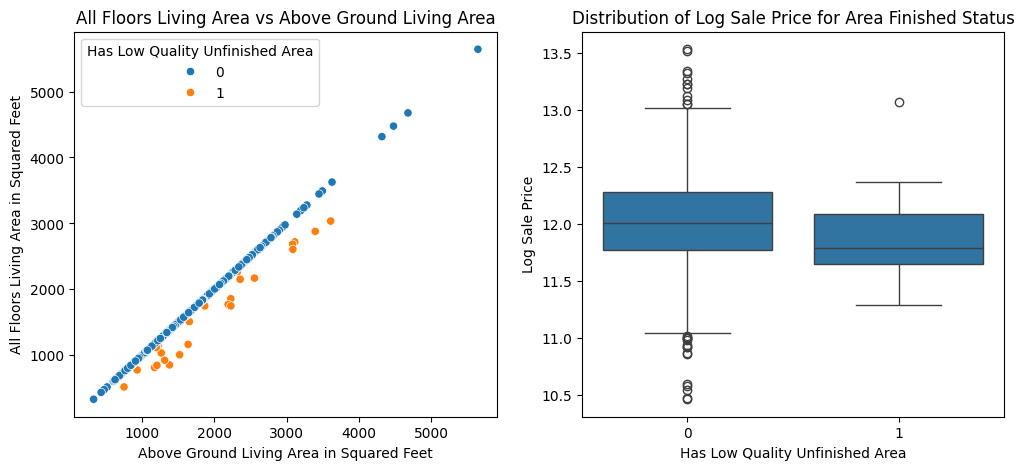

has_low_qual_fin_area
0    1434
1      26
Name: count, dtype: int64


In [55]:
df["FlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

df["has_low_qual_fin_area"] = np.where(df["LowQualFinSF"] > 1, 1, 0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("All Floors Living Area vs Above Ground Living Area")
ax1.set(
    xlabel="Above Ground Living Area in Squared Feet",
    ylabel="All Floors Living Area in Squared Feet",
)
sns.scatterplot(data=df, x="GrLivArea", y="FlrSF", hue="has_low_qual_fin_area", ax=ax1)
ax1.legend(title="Has Low Quality Unfinished Area")

ax2.set_title("Distribution of Log Sale Price for Area Finished Status")
ax2.set(xlabel="Has Low Quality Unfinished Area", ylabel="Log Sale Price")
sns.boxplot(data=df, x="has_low_qual_fin_area", y="log_sale_price", ax=ax2)
plt.show()
print(df["has_low_qual_fin_area"].value_counts())

In [56]:
# Unfinished living area is not well represented, there are only 26 obs in the train df.
# I don't think it has significant impact on the price

ExterQual_grouped
Low         14
Average    906
High       540
Name: count, dtype: int64


BsmtQual_grouped
Low         72
Average    649
High       739
Name: count, dtype: int64


HeatingQC_grouped
Low         50
Average    428
High       982
Name: count, dtype: int64


KitchenQual_grouped
Low         39
Average    735
High       686
Name: count, dtype: int64


GarageQual_grouped
Low         132
Average    1311
High         17
Name: count, dtype: int64


FireplaceQu_grouped
Low        743
Average    313
High       404
Name: count, dtype: int64


PoolQC_grouped
Low        1455
Average       0
High          5
Name: count, dtype: int64




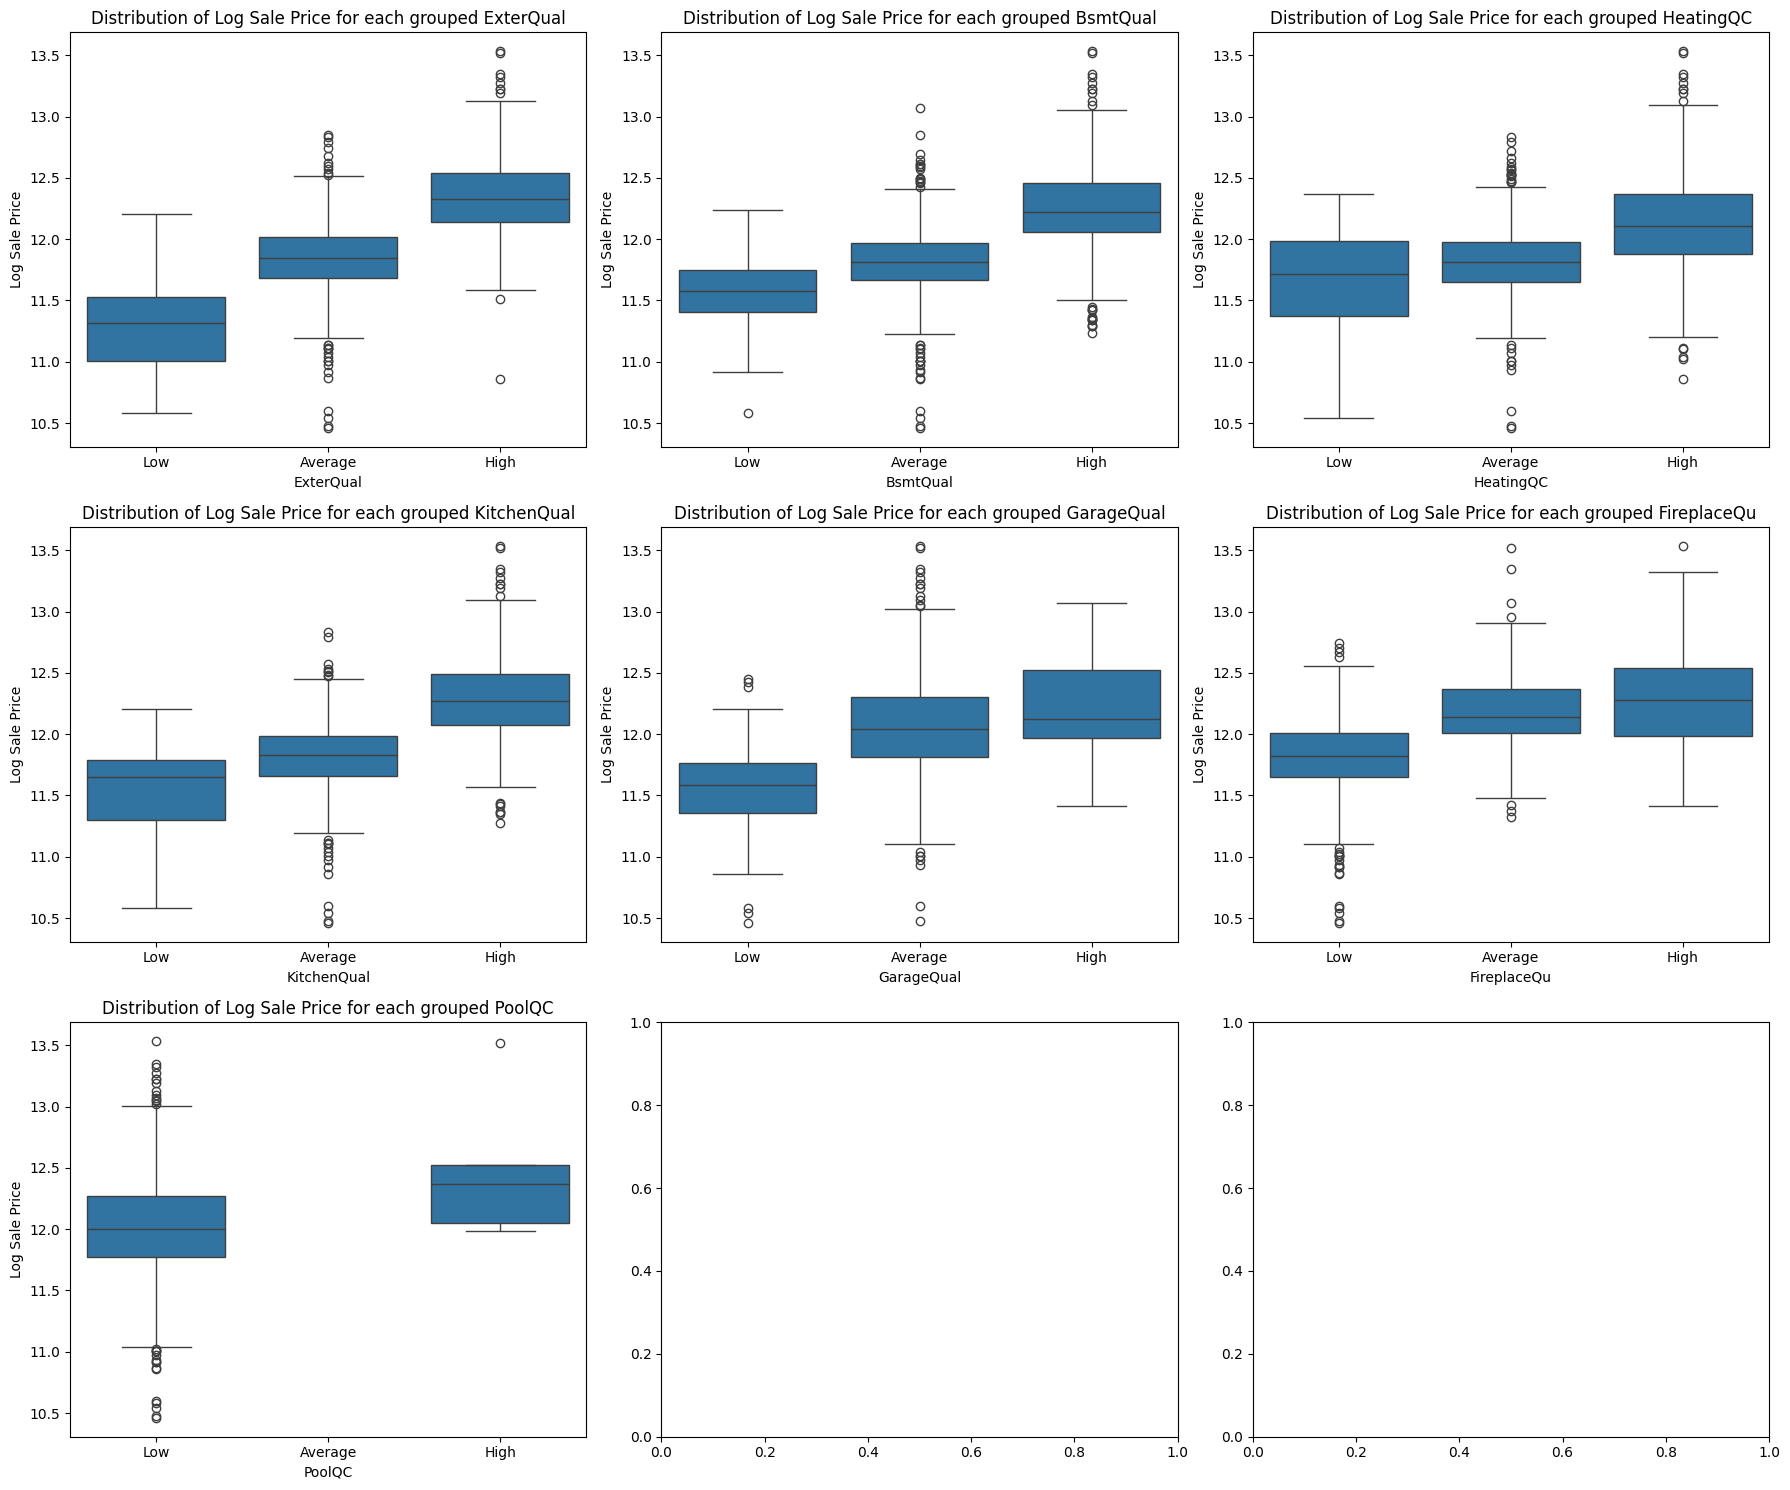

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
qual_vars = [
    ["ExterQual", "BsmtQual", "HeatingQC"],
    ["KitchenQual", "GarageQual", "FireplaceQu"],
    ["PoolQC"],
]
for i, row in enumerate(qual_vars):
    for j, col in enumerate(row):
        print(df[f"{col}_grouped"].value_counts(sort=False))
        print("\n")
        ax = axes[i][j]
        sns.boxplot(data=df, x=f"{col}_grouped", y="log_sale_price", ax=ax)
        ax.set_title(f"Distribution of Log Sale Price for each grouped {col}")
        ax.set(xlabel=col, ylabel="Log Sale Price")

plt.tight_layout()
plt.show()

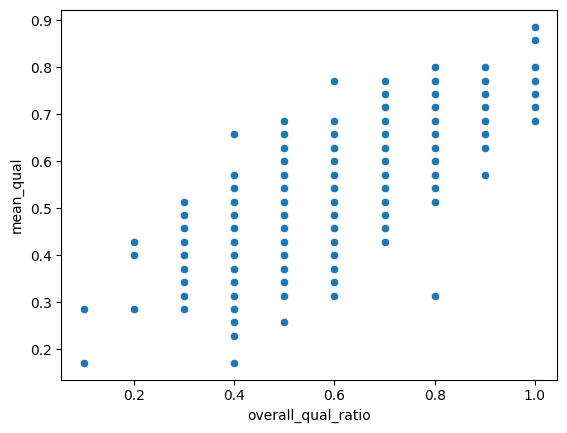

0.7748736419410495
ExterQual_ratio mean root squared difference from overall quality ratio: 0.11846622546254466;

BsmtQual_ratio mean root squared difference from overall quality ratio: 0.16446259515610065;

KitchenQual_ratio mean root squared difference from overall quality ratio: 0.14336943370379876;

GarageQual_ratio mean root squared difference from overall quality ratio: 0.17495596314814735;

HeatingQC_ratio mean root squared difference from overall quality ratio: 0.2822730631707192;

FireplaceQu_ratio mean root squared difference from overall quality ratio: 0.4012736571782472;

PoolQC_ratio mean root squared difference from overall quality ratio: 0.6232537248019077;



In [58]:
value_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0}

qual_vars = [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageQual",
    "HeatingQC",
    "FireplaceQu",
    "PoolQC",
]
for var in qual_vars:
    df[f"{var}_ratio"] = df[var].map(value_map).astype(float) / 5

df["mean_qual"] = df[map(lambda v: v + "_ratio", qual_vars)].mean(axis=1)
df["overall_qual_ratio"] = df["OverallQual"].astype(int) / 10

sns.scatterplot(data=df, x="overall_qual_ratio", y="mean_qual")
plt.show()

print(df["mean_qual"].corr(df["overall_qual_ratio"]))  # 0.7748736419410495

for var in map(lambda v: v + "_ratio", qual_vars):
    rmsd = np.sqrt(((df[var] - df["overall_qual_ratio"]) ** 2).mean())
    print(f"{var} mean root squared difference from overall quality ratio: {rmsd};\n")

In [59]:
# Taking mean of quality metrics show that they are often different from the OverallQual value.
# So OverallQual can't be proxy for all quality indicators

BsmtExposure
NA     37
No    954
Mn    114
Av    221
Gd    134
Name: count, dtype: int64


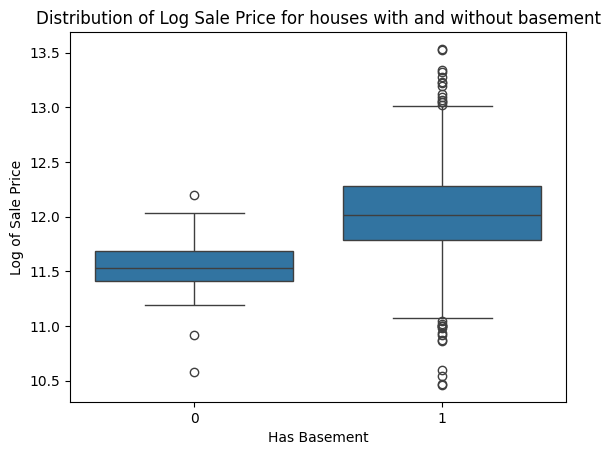

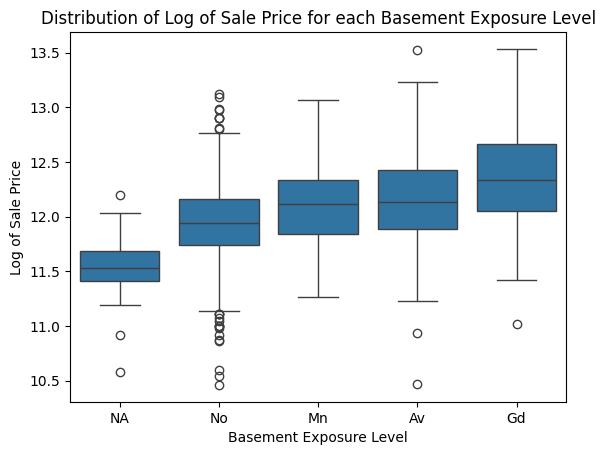

In [60]:
# Basement
print(df["BsmtExposure"].value_counts(sort=False))

sns.boxplot(data=df, x="has_basement", y="log_sale_price")
plt.title("Distribution of Log Sale Price for houses with and without basement")
plt.xlabel("Has Basement")
plt.ylabel("Log of Sale Price")
plt.show()

sns.boxplot(data=df, x="BsmtExposure", y="log_sale_price")
plt.title("Distribution of Log of Sale Price for each Basement Exposure Level")
plt.xlabel("Basement Exposure Level")
plt.ylabel("Log of Sale Price")
plt.show()

In [61]:
# It seems basement exposure has some impact on the price

BsmtFinType1
NA      37
Unf    430
LwQ     74
Rec    133
BLQ    148
ALQ    220
GLQ    418
Name: count, dtype: int64
BsmtFinType2
NA       37
Unf    1257
LwQ      46
Rec      54
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


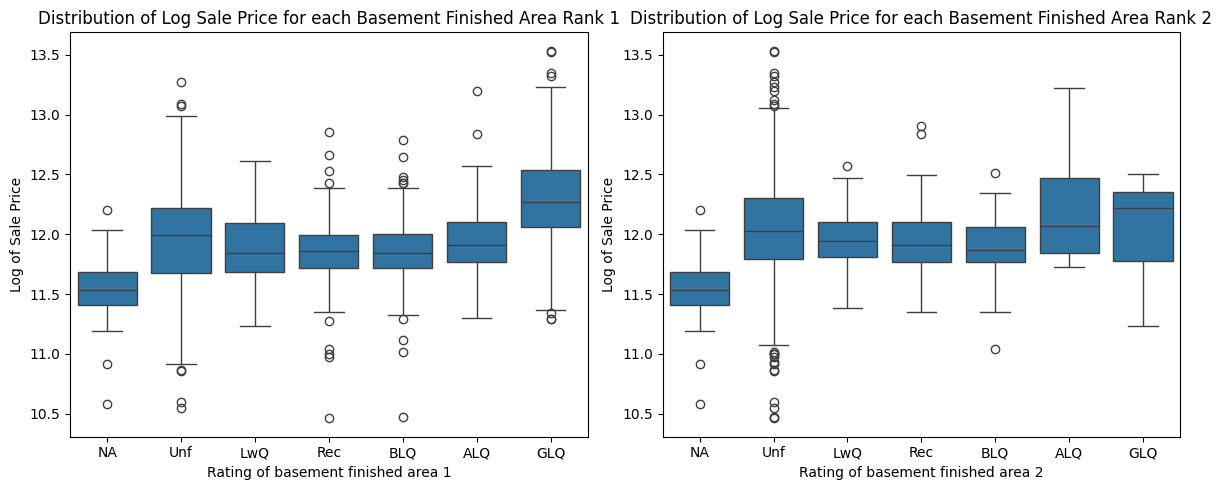

In [62]:
print(df["BsmtFinType1"].value_counts(sort=False))
print(df["BsmtFinType2"].value_counts(sort=False))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("Distribution of Log Sale Price for each Basement Finished Area Rank 1")
ax1.set(xlabel="Rating of basement finished area 1", ylabel="Log of Sale Price")
sns.boxplot(data=df, x="BsmtFinType1", y="log_sale_price", ax=ax1)
ax2.set_title("Distribution of Log Sale Price for each Basement Finished Area Rank 2")
ax2.set(xlabel="Rating of basement finished area 2", ylabel="Log of Sale Price")
sns.boxplot(data=df, x="BsmtFinType2", y="log_sale_price", ax=ax2)
plt.tight_layout()
plt.show()

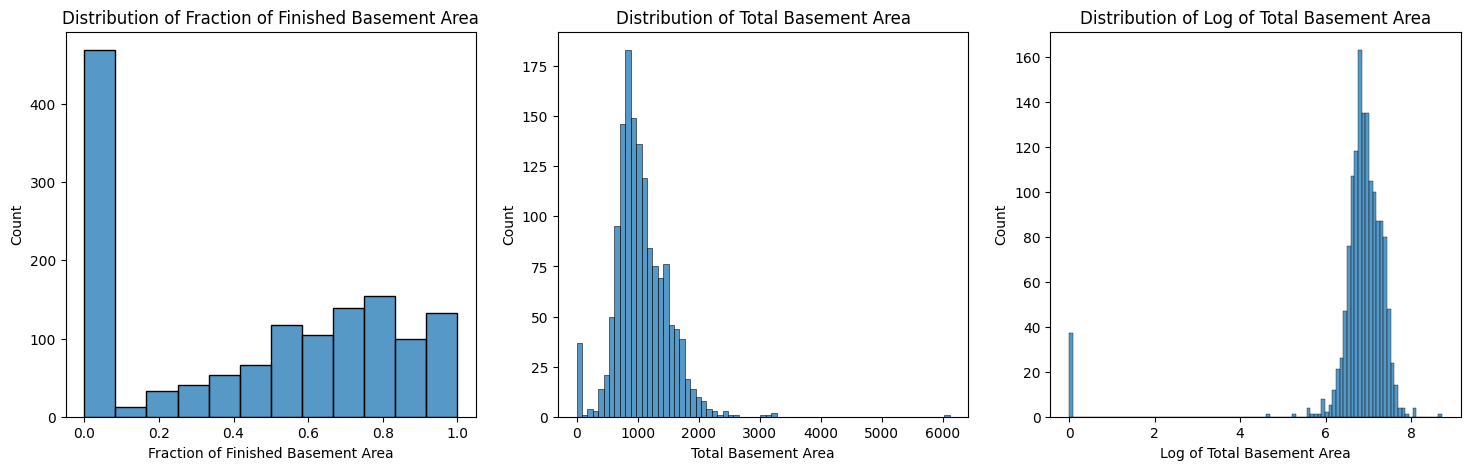

In [63]:
df["finished_bsmt_area_ratio"] = 1 - (df["BsmtUnfSF"] / df["TotalBsmtSF"])
df["log_total_bsmt_sf"] = np.log1p(df["TotalBsmtSF"])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=df, x="finished_bsmt_area_ratio", ax=ax1)
ax1.set_title("Distribution of Fraction of Finished Basement Area")
ax1.set(xlabel="Fraction of Finished Basement Area")
sns.histplot(data=df, x="TotalBsmtSF", ax=ax2)
ax2.set_title("Distribution of Total Basement Area")
ax2.set(xlabel="Total Basement Area")
sns.histplot(data=df, x="log_total_bsmt_sf", ax=ax3)
ax3.set_title("Distribution of Log of Total Basement Area")
ax3.set(xlabel="Log of Total Basement Area")
plt.show()

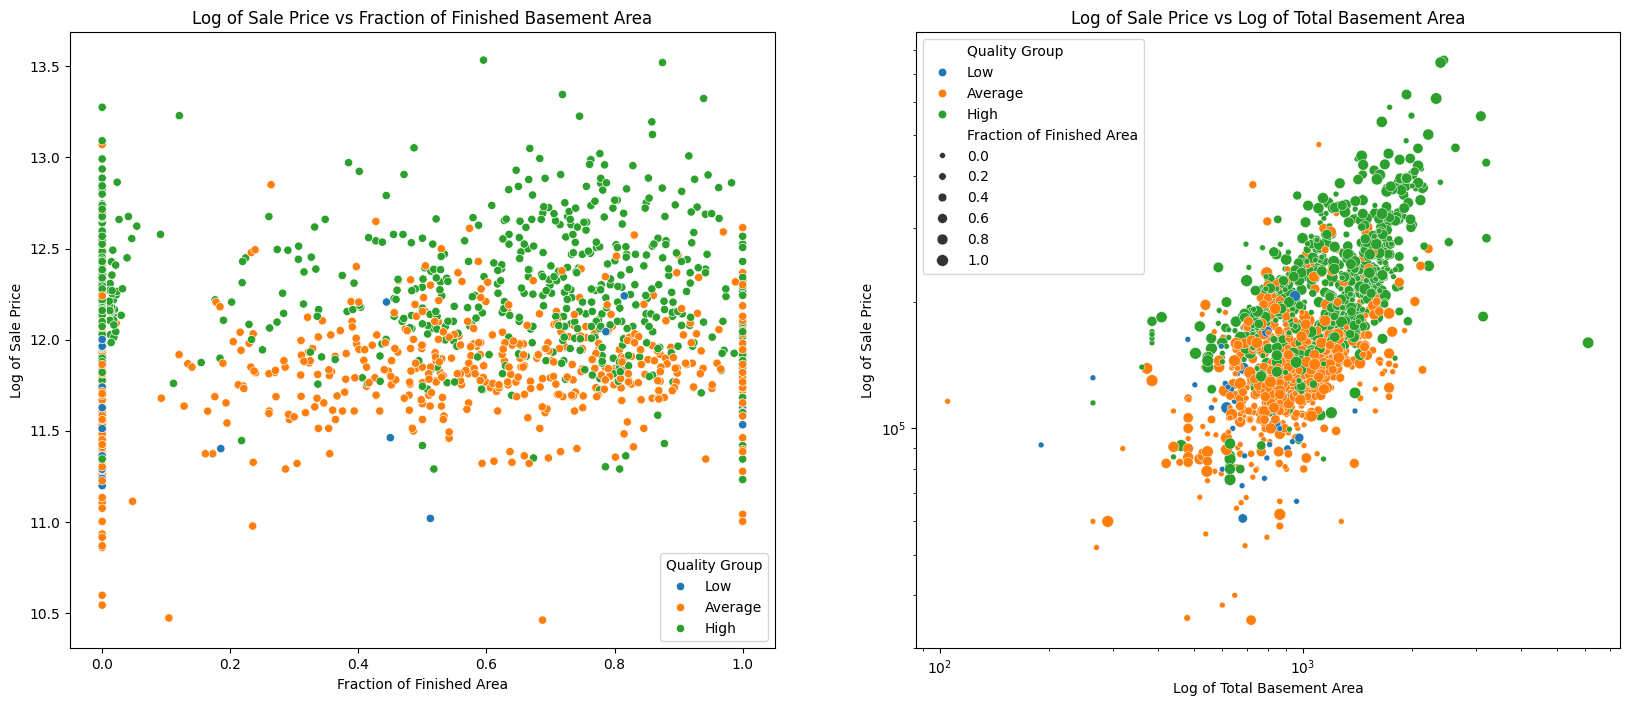

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# First plot
ax1.set_title("Log of Sale Price vs Fraction of Finished Basement Area")
ax1.set(xlabel="Fraction of Finished Area", ylabel="Log of Sale Price")
sns.scatterplot(
    data=df[df["has_basement"] == 1],
    x="finished_bsmt_area_ratio",
    y="log_sale_price",
    hue="BsmtQual_grouped",
    hue_order=["Low", "Average", "High"],
    ax=ax1,
)
ax1.legend(title="Quality Group")

# Second plot
ax2.set_title("Log of Sale Price vs Log of Total Basement Area")
ax2.set(
    xscale="log",
    yscale="log",
    xlabel="Log of Total Basement Area",
    ylabel="Log of Sale Price",
)
scatter = sns.scatterplot(
    data=df[df["has_basement"] == 1],
    x="TotalBsmtSF",
    y="SalePrice",
    hue="BsmtQual_grouped",
    size="finished_bsmt_area_ratio",  # This controls the size of points
    hue_order=["Low", "Average", "High"],
    ax=ax2,
)

# Update the legend title for the size field
handles, labels = scatter.get_legend_handles_labels()
# Find the index of the size legend
size_index = labels.index("finished_bsmt_area_ratio")
qual_index = labels.index("BsmtQual_grouped")
# Replace the label with the new string
labels[size_index] = "Fraction of Finished Area"
labels[qual_index] = "Quality Group"
# Recreate the legend with the updated labels
ax2.legend(handles, labels)

plt.show()

In [65]:
df["has_low_qual"] = np.where(df["grouped_qual"].astype(str) == "Low", True, False)

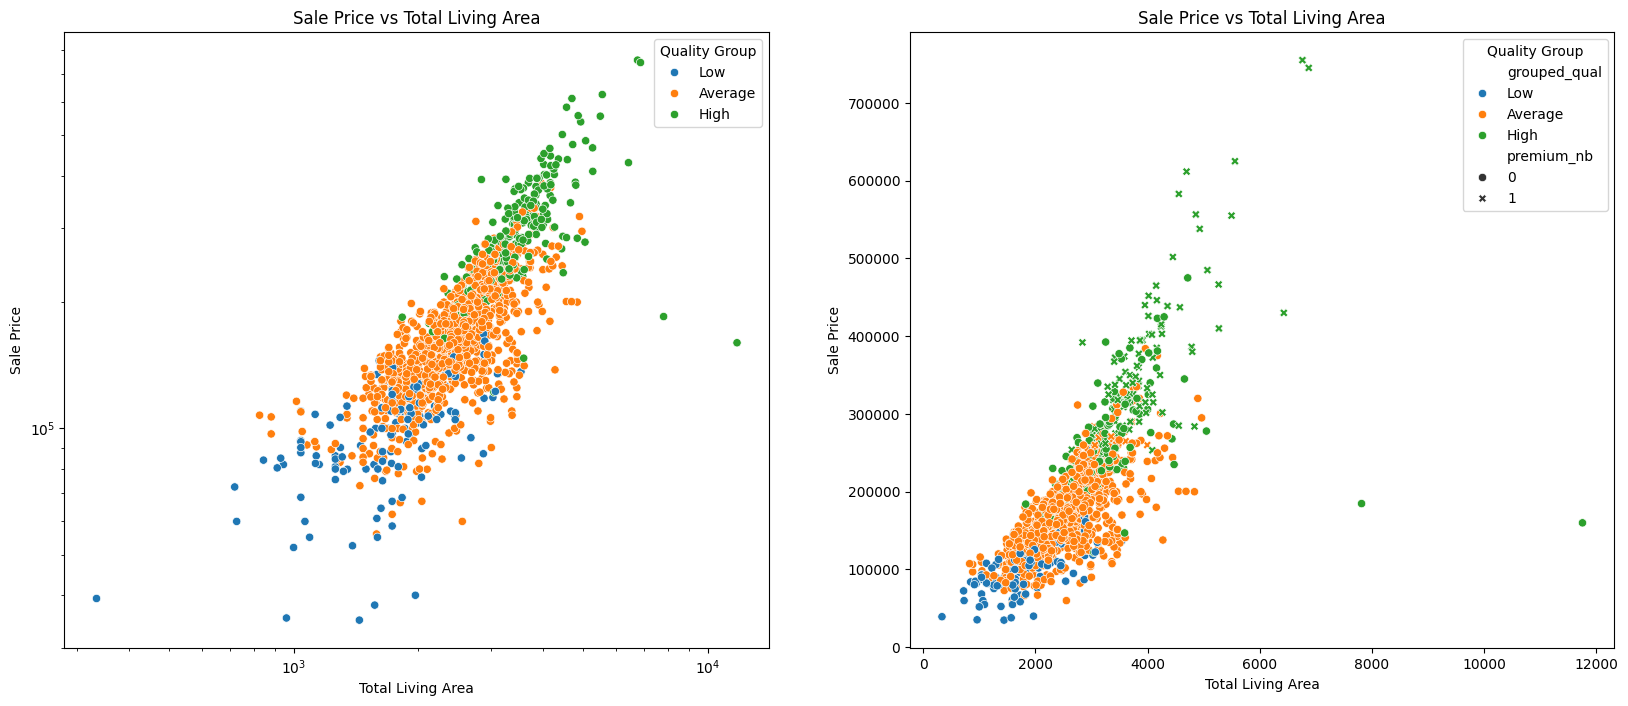

0.8035906050846945
0.7789588289942257


In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set(xscale="log", yscale="log", xlabel="Total Living Area", ylabel="Sale Price")
ax1.set_title("Sale Price vs Total Living Area")
sns.scatterplot(data=df, x="total_liv_area", y="SalePrice", hue="grouped_qual", ax=ax1)
ax1.legend(title="Quality Group")

ax2.set(xlabel="Total Living Area", ylabel="Sale Price")
ax2.set_title("Sale Price vs Total Living Area")
sns.scatterplot(
    data=df,
    x="total_liv_area",
    y="SalePrice",
    hue="grouped_qual",
    style="premium_nb",
    ax=ax2,
)
ax2.legend(title="Quality Group")
plt.show()

print(df["log_sale_price"].corr(np.log(df["total_liv_area"])))
print(df["SalePrice"].corr(df["total_liv_area"]))

In [67]:
# Get low quality homes data

# Create the plot with a different color scheme
fig = px.scatter(
    df,
    x="total_liv_area",
    y="SalePrice",
    color="grouped_qual",
    # color_discrete_map={'True': 'blue', 'False': 'red'},  # Map colors to categories
    hover_data=["Id", "Neighborhood", "OverallQual"],  # Include neighborhood in hover
    # log_x=True,
    # log_y=True,
    title="Sale Price vs Total Living Area",
    labels={
        "total_liv_area": "Total Living Area",
        "SalePrice": "Sale Price",
        "has_basement": "Has Basement",
    },
)

# Update hover template
fig.update_traces(
    hovertemplate="ID: %{customdata[0]}<br>"
    + "Price: $%{y:,.0f}<br>"
    + "Area: %{x:.0f} sq ft<br>"
    + "Neighborhood: %{customdata[1]}<br>"
    + "Actual quality index: %{customdata[2]}<br>"
    "<extra></extra>"
)

# Update layout
fig.update_layout(
    title_x=0.5,
    height=600,
    width=800,
    # Update legend
    legend=dict(title="Has Basement", yanchor="top", y=0.99, xanchor="right", x=0.99),
)

fig.show()

In [68]:
df_1 = df[~df["Id"].isin([524, 1299])]
print(df_1["SalePrice"].corr(df["total_liv_area"]))
print(df_1["log_sale_price"].corr(df["total_liv_area"]))

0.8290419781065507
0.8207381208668487


In [69]:
print(df[df["Id"].isin([524, 1299])].transpose())

                                          523        1298
Id                                         524       1299
MSSubClass                                  60         60
MSZoning                                    RL         RL
LotFrontage                              130.0      313.0
LotArea                                  40094      63887
Street                                    Pave       Pave
Alley                                       NA         NA
LotShape                                   IR1        IR3
LandContour                                Bnk        Bnk
Utilities                               AllPub     AllPub
LotConfig                               Inside     Corner
LandSlope                                  Gtl        Gtl
Neighborhood                           Edwards    Edwards
Condition1                                PosN      Feedr
Condition2                                PosN       Norm
BldgType                                  1Fam       1Fam
HouseStyle    

                        std           mean
Neighborhood                              
NoRidge       121412.658640  335295.317073
NridgHt        96392.544954  316270.623377
StoneBr       112969.676640  310499.000000
Timber         64845.651549  242247.447368
Veenker        72369.317959  238772.727273
Somerst        56177.555888  225379.837209
ClearCr        50231.538993  212565.428571
Crawfor        68866.395472  210624.725490
CollgCr        51403.666438  197965.773333
Blmngtn        30393.229219  194870.882353
Gilbert        35986.779085  192854.506329
NWAmes         37172.218106  189050.068493
SawyerW        55651.997820  186555.796610
Mitchel        36486.625334  156270.122449
NAmes          33075.345450  145847.080000
NPkVill         9377.314529  142694.444444
SWISU          32622.917679  142591.360000
Blueste        19091.883092  137500.000000
Sawyer         22345.129157  136793.135135
OldTown        52650.583185  128225.300885
Edwards        43208.616459  128219.700000
BrkSide    

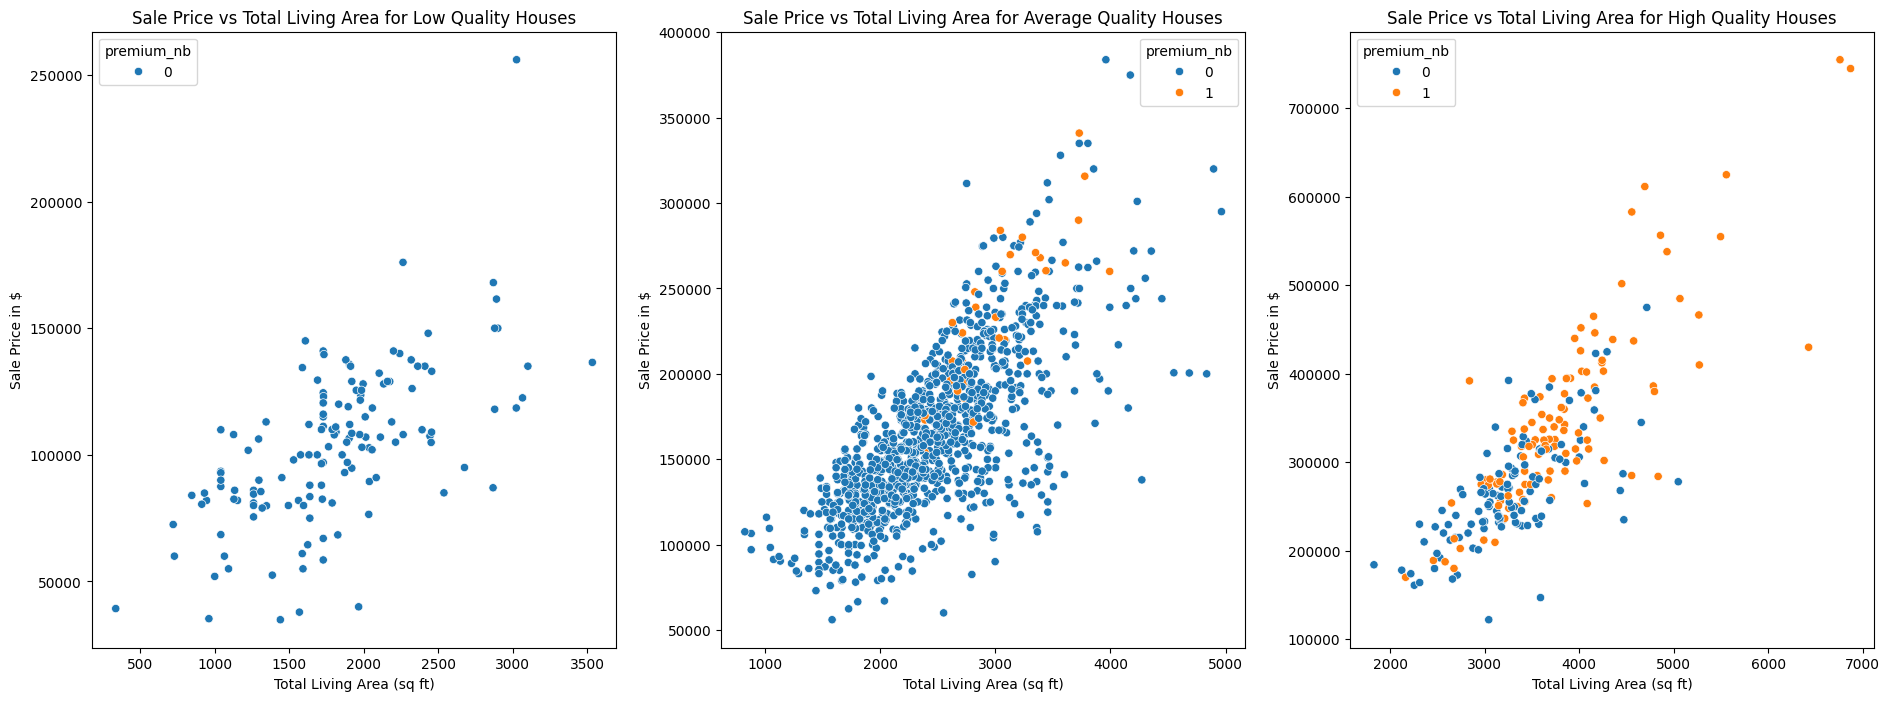

In [70]:
print(
    df.groupby("Neighborhood", observed=True)["SalePrice"]
    .agg(["std", "mean"])
    .sort_values(by="mean", ascending=False)
)


fig, axes = plt.subplots(1, 3, figsize=(23, 8))
for i, qual in enumerate(qual_groups):
    axes[i].set_title(f"Sale Price vs Total Living Area for {qual} Quality Houses")
    axes[i].set(xlabel="Total Living Area (sq ft)", ylabel="Sale Price in $")
    sns.scatterplot(
        data=df_1[df_1["grouped_qual"] == qual],
        x="total_liv_area",
        y="SalePrice",
        hue="premium_nb",
        ax=axes[i],
    )

plt.show()

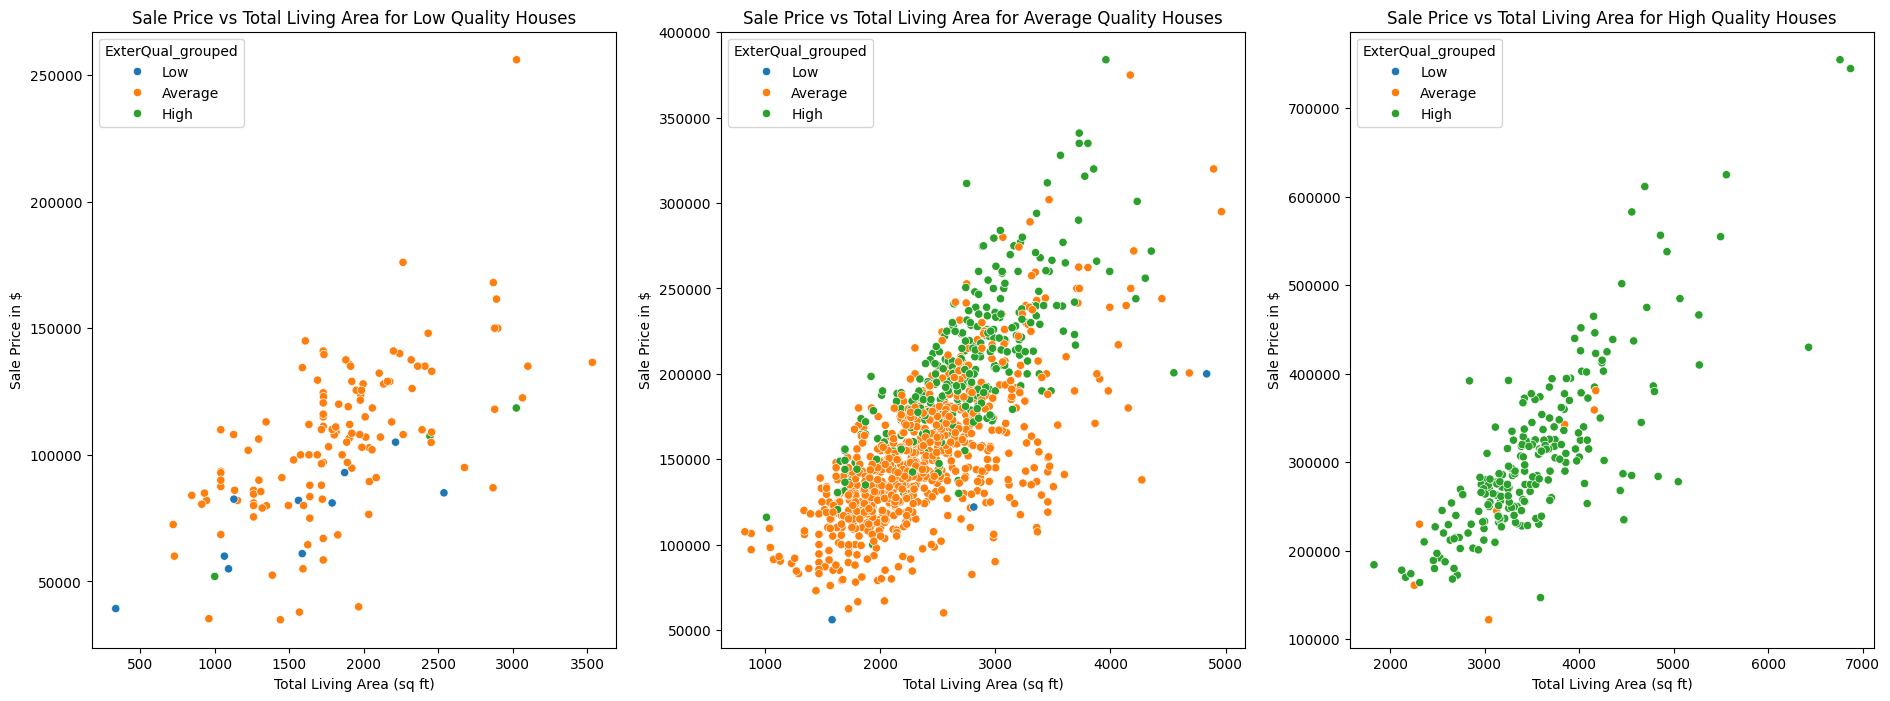

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(23, 8))
for i, qual in enumerate(qual_groups):
    axes[i].set_title(f"Sale Price vs Total Living Area for {qual} Quality Houses")
    axes[i].set(xlabel="Total Living Area (sq ft)", ylabel="Sale Price in $")
    sns.scatterplot(
        data=df_1[df_1["grouped_qual"] == qual],
        x="total_liv_area",
        y="SalePrice",
        hue="ExterQual_grouped",
        ax=axes[i],
    )

plt.show()

468


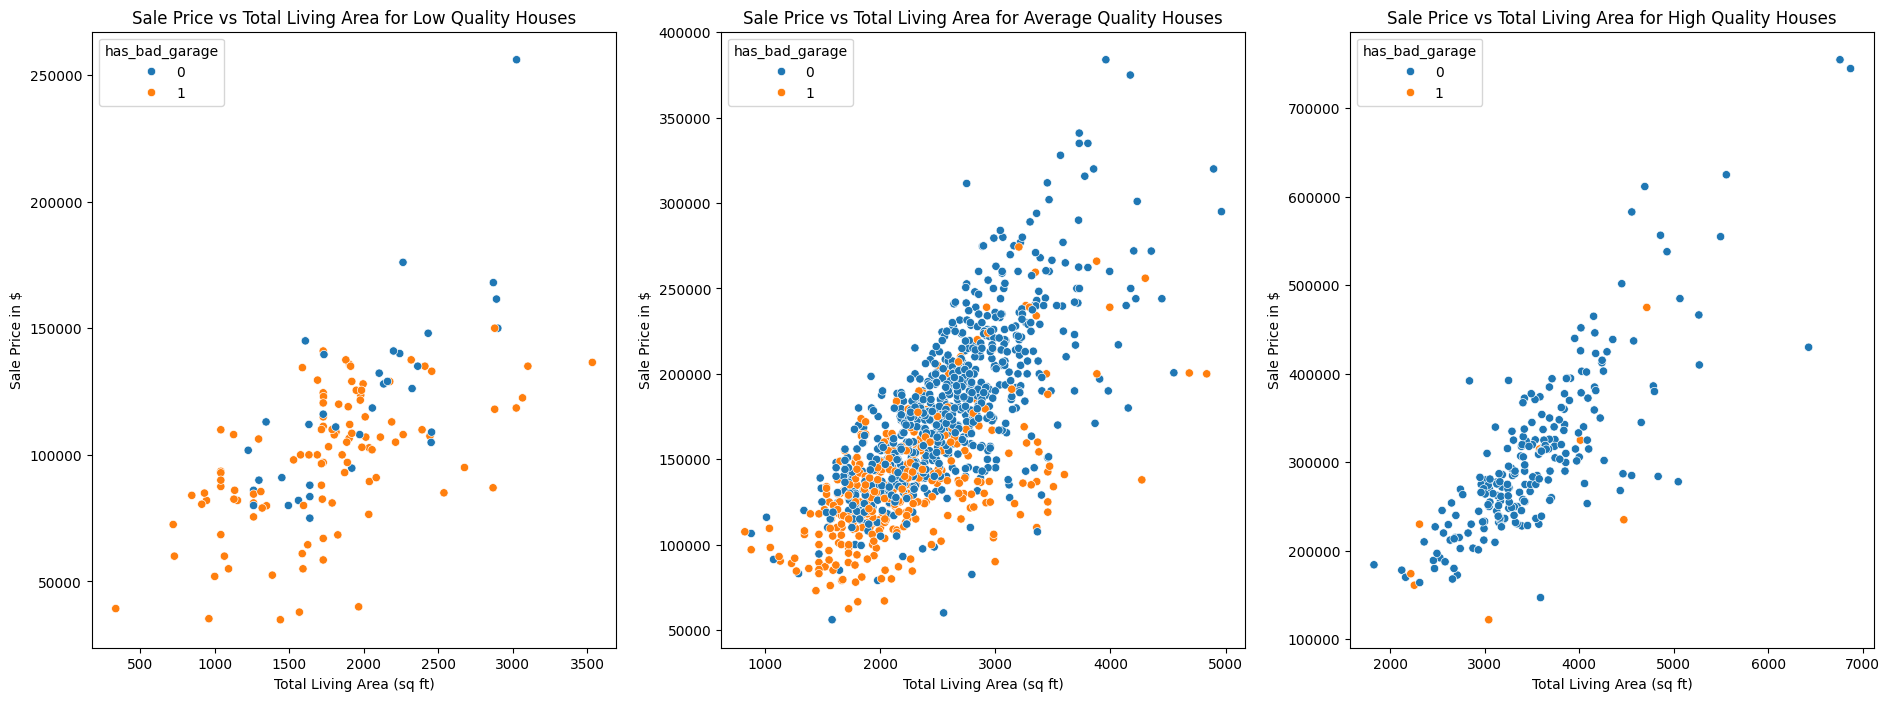

In [72]:
print(sum(df_1["GarageType"].isin(["NA", "Detchd"])))

fig, axes = plt.subplots(1, 3, figsize=(23, 8))
for i, qual in enumerate(qual_groups):
    axes[i].set_title(f"Sale Price vs Total Living Area for {qual} Quality Houses")
    axes[i].set(xlabel="Total Living Area (sq ft)", ylabel="Sale Price in $")
    sns.scatterplot(
        data=df_1[df_1["grouped_qual"] == qual],
        x="total_liv_area",
        y="SalePrice",
        hue="has_bad_garage",
        ax=axes[i],
    )

plt.show()

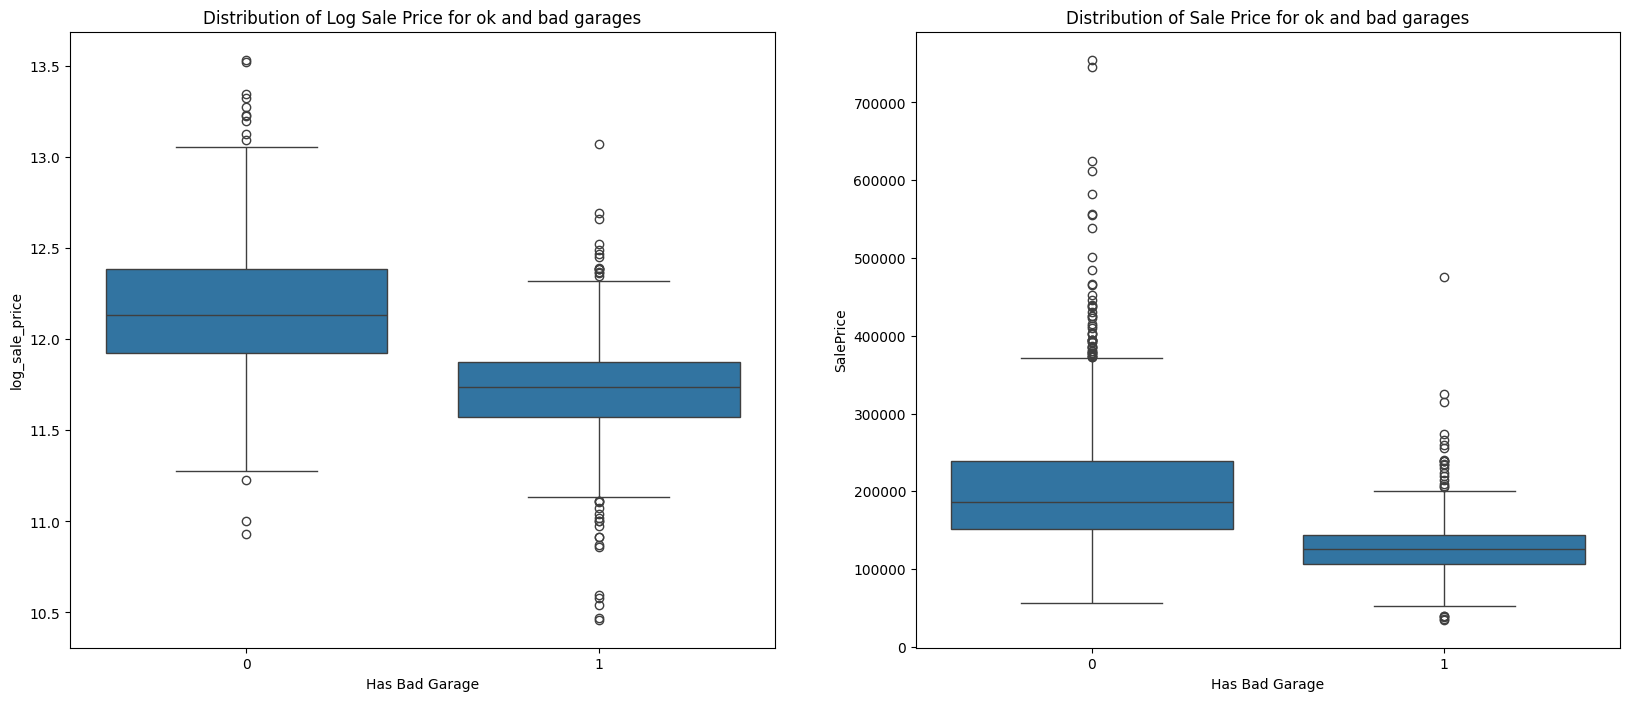

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(df_1, x="has_bad_garage", y="log_sale_price", ax=ax1)
ax1.set_title("Distribution of Log Sale Price for ok and bad garages")
ax1.set_xlabel("Has Bad Garage")
sns.boxplot(df_1, x="has_bad_garage", y="SalePrice", ax=ax2)
ax2.set_title("Distribution of Sale Price for ok and bad garages")
ax2.set_xlabel("Has Bad Garage")
plt.show()

In [74]:

print(df["has_bad_garage"].value_counts())

fig = px.scatter(
    df[df["grouped_qual"].astype(str) == "Average"],
    x="total_liv_area",
    y="SalePrice",
    color="has_bad_garage",
    # color_discrete_map={'True': 'blue', 'False': 'red'},  # Map colors to categories
    hover_data=["Id", "Neighborhood", "OverallQual"],  # Include neighborhood in hover
    # log_x=True,
    # log_y=True,
    title="Sale Price vs Total Living Area",
    labels={
        "total_liv_area": "Total Living Area",
        "SalePrice": "Sale Price",
        "has_bad_garage": "Bad Garage",
    },
)

# Update hover template
fig.update_traces(
    hovertemplate="ID: %{customdata[0]}<br>"
    + "Price: $%{y:,.0f}<br>"
    + "Area: %{x:.0f} sq ft<br>"
    + "Neighborhood: %{customdata[1]}<br>"
    + "Actual quality index: %{customdata[2]}<br>"
    "<extra></extra>"
)

# Update layout
fig.update_layout(
    title_x=0.5,
    height=600,
    width=800,
    # Update legend
    legend=dict(title="Has Bad Garage", yanchor="top", y=0.99, xanchor="right", x=0.99),
)

fig.show()

has_bad_garage
0    988
1    472
Name: count, dtype: int64


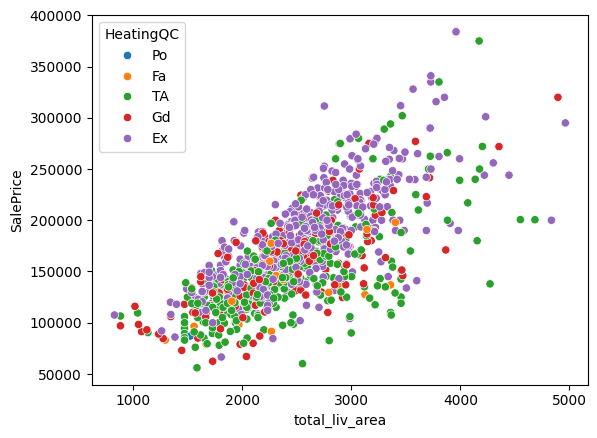

In [75]:
sns.scatterplot(data = df[df["grouped_qual"].astype(str) == "Average"], x = "total_liv_area", y ="SalePrice", hue="HeatingQC")
plt.show()

In [76]:
print(df[df["Id"] == 411].transpose())

                                          410
Id                                        411
MSSubClass                                 20
MSZoning                                   RL
LotFrontage                              68.0
LotArea                                  9571
Street                                   Pave
Alley                                      NA
LotShape                                  Reg
LandContour                               Lvl
Utilities                              AllPub
LotConfig                              Inside
LandSlope                                 Gtl
Neighborhood                          Edwards
Condition1                               Norm
Condition2                               Norm
BldgType                                 1Fam
HouseStyle                             1Story
OverallQual                                 5
OverallCond                                 3
YearBuilt                                1958
YearRemodAdd                      

premium_nb
0    1317
1     143
Name: count, dtype: int64
0.871738232688333
0.8627854133899042


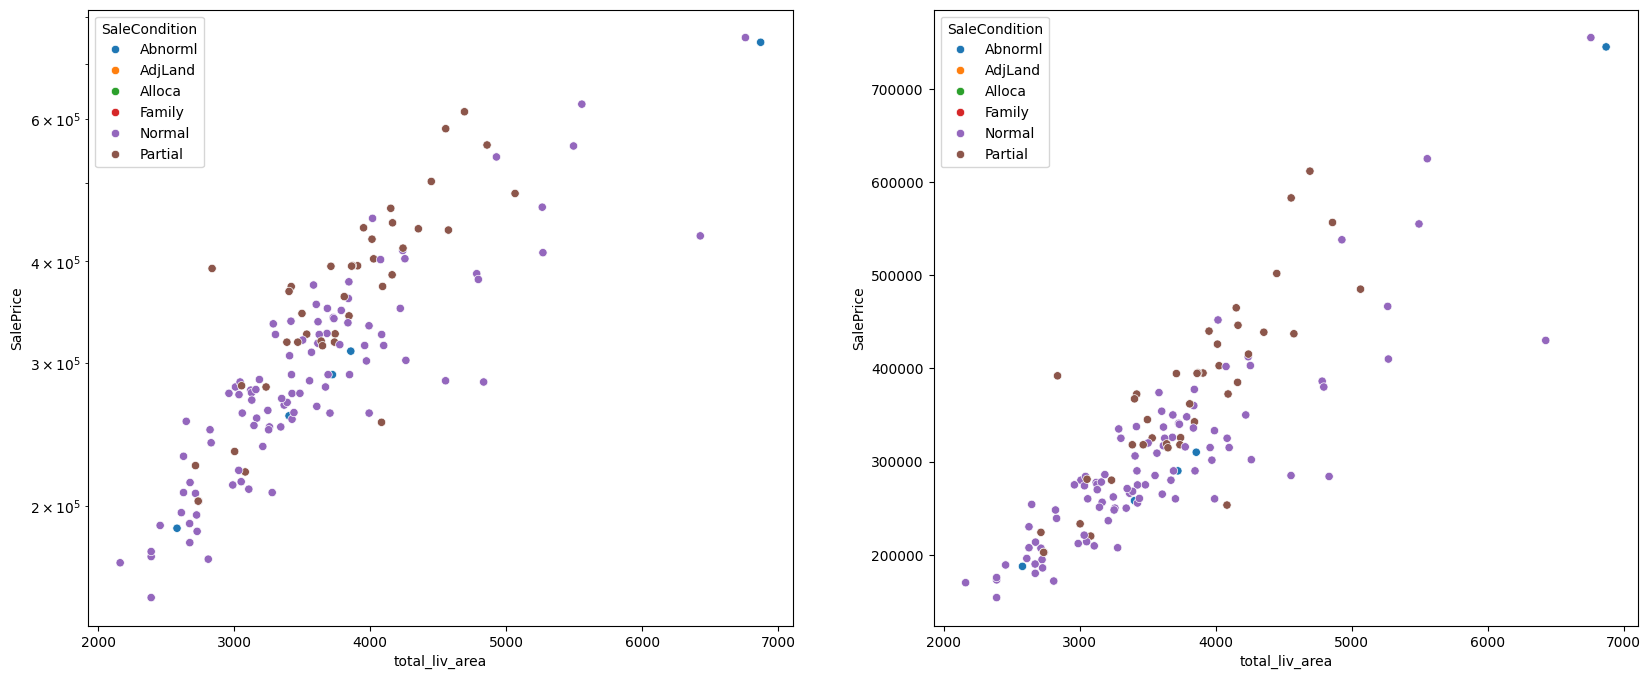

In [87]:
df["is_renovated"] = np.where(df["YearRemodAdd"] > df["YearBuilt"], 1, 0)

print(df["premium_nb"].value_counts())

print(
    df[df["premium_nb"] == 1]["log_sale_price"].corr(
        np.log(df[df["premium_nb"] == 1]["total_liv_area"])
    )
)
print(
    df[df["premium_nb"] == 1]["SalePrice"].corr(
        df[df["premium_nb"] == 1]["total_liv_area"]
    )
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(
    data=df[df["premium_nb"] == 1],
    x="total_liv_area",
    y="SalePrice",
    ax=ax1,
    # size="YearBuilt"
    hue="SaleCondition"
)
# ax1.set_xscale("log")
ax1.set_yscale("log")

sns.scatterplot(
    data=df[df["premium_nb"] == 1],
    x="total_liv_area",
    y="SalePrice",
    ax=ax2,
    # size="YearBuilt"
    hue="SaleCondition"
)
plt.show()

In [78]:
fig = px.scatter(
    df_1,
    x="total_liv_area",
    y="SalePrice",
    color="grouped_qual",
    # color_discrete_map={'True': 'blue', 'False': 'red'},  # Map colors to categories
    hover_data=["Id", "Neighborhood", "OverallQual"],  # Include neighborhood in hover
    # log_x=True,
    # log_y=True,
    title="Sale Price vs Total Living Area",
    labels={
        "total_liv_area": "Total Living Area",
        "SalePrice": "Sale Price",
        "has_basement": "Has Basement",
    },
)

# Update hover template
fig.update_traces(
    hovertemplate="ID: %{customdata[0]}<br>"
    + "Price: $%{y:,.0f}<br>"
    + "Area: %{x:.0f} sq ft<br>"
    + "Neighborhood: %{customdata[1]}<br>"
    + "Actual quality index: %{customdata[2]}<br>"
    "<extra></extra>"
)

# Update layout
fig.update_layout(
    title_x=0.5,
    height=600,
    width=800,
    # Update legend
    legend=dict(title="Grouped Quality", yanchor="top", y=0.99, xanchor="right", x=0.99),
)

fig.show()

In [79]:
# Investigating low quality houses

In [80]:
print(df["grouped_qual"].value_counts(sort=False))

grouped_qual
Low         141
Average    1090
High        229
Name: count, dtype: int64


In [81]:
from scipy.stats import chi2_contingency

# First, let's identify all categorical variables
categorical_vars = df.select_dtypes(include=["category"]).columns.tolist()

qual_derivatives = [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageQual",
    "HeatingQC",
    "FireplaceQu",
    "PoolQC",
]

grouped_qual = [var + "_grouped" for var in qual_derivatives]

qual_vars = qual_derivatives + grouped_qual
qual_vars += ["grouped_qual", "OverallQual"]

categorical_vars = [var for var in categorical_vars if var not in qual_vars]


# Function to calculate and compare distributions
def compare_distributions(df, variable, low_qual_flag="has_low_qual"):
    # Calculate distributions
    props_orig = df.loc[~df[low_qual_flag], variable].value_counts(normalize=True)
    props_low = df.loc[df[low_qual_flag], variable].value_counts(normalize=True)

    # Join distributions
    comparison = pd.concat(
        [props_orig, props_low], axis=1, keys=["Other Houses", "Low Quality"]
    )

    # Calculate entropies
    entropy_orig = -np.sum(props_orig * np.log2(props_orig + 1e-10))
    entropy_low = -np.sum(props_low * np.log2(props_low + 1e-10))

    # Perform chi-square test
    contingency = pd.crosstab(df[variable], df[low_qual_flag])
    chi2, p_value = chi2_contingency(contingency)[:2]

    # Calculate effect size (Cramer's V)
    n = len(df)
    min_dim = min(contingency.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))

    return {
        "comparison": comparison,
        "entropy_diff": entropy_orig - entropy_low,
        "chi2_stat": chi2,
        "p_value": p_value,
        "cramer_v": cramer_v,
    }


# Analyze all categorical variables
significant_vars = []
for var in categorical_vars:
    if var != "has_low_qual":  # Skip our flag variable
        print(f"\nAnalyzing {var}")
        print("-" * 50)

        results = compare_distributions(df, var)

        # Print results
        print("\nDistribution Comparison:")
        print(results["comparison"].round(3))
        print(f"\nEntropy difference: {results['entropy_diff']:.3f}")
        print(f"Chi-square statistic: {results['chi2_stat']:.3f}")
        print(f"P-value: {results['p_value']:.3e}")
        print(f"Cramer's V: {results['cramer_v']:.3f}")

        # Store significant variables
        if results["p_value"] < 0.05 and results["cramer_v"] > 0.1:
            significant_vars.append(
                {
                    "variable": var,
                    "cramer_v": results["cramer_v"],
                    "p_value": results["p_value"],
                }
            )

# Summarize most important differences
print("\nMost significant differences:")
significant_df = pd.DataFrame(significant_vars)
print(significant_df.sort_values("cramer_v", ascending=False))


Analyzing MSSubClass
--------------------------------------------------

Distribution Comparison:
            Other Houses  Low Quality
MSSubClass                           
20                 0.369        0.348
60                 0.227        0.000
50                 0.091        0.170
120                0.066        0.000
160                0.045        0.028
80                 0.043        0.007
70                 0.042        0.035
90                 0.031        0.078
30                 0.030        0.213
190                0.017        0.057
85                 0.014        0.007
75                 0.011        0.007
45                 0.008        0.007
40                 0.003        0.000
180                0.003        0.043

Entropy difference: 0.177
Chi-square statistic: 193.124
P-value: 1.389e-33
Cramer's V: 0.364

Analyzing MSZoning
--------------------------------------------------

Distribution Comparison:
          Other Houses  Low Quality
MSZoning                    

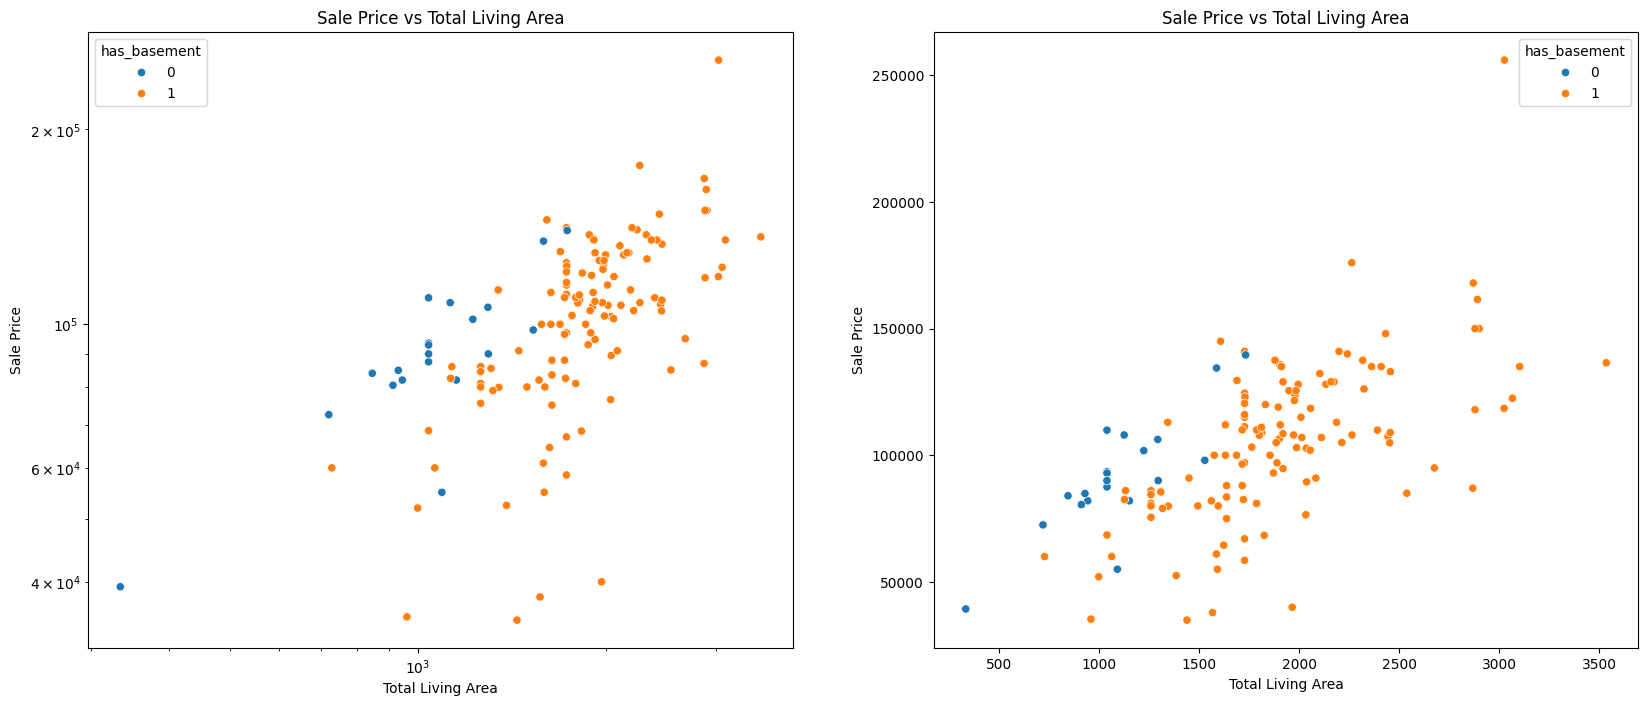

In [82]:
neighborhoods_with_low = df[df["grouped_qual"].astype(str) == "Low"][
    "Neighborhood"
].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(
    data=df[df["has_low_qual"]],
    x="total_liv_area",
    y="SalePrice",
    hue="has_basement",
    # style="has_garage",
    # hue_order=neighborhoods_with_low,
    ax=ax1,
)
ax1.set_title("Sale Price vs Total Living Area")
ax1.set(xlabel="Total Living Area", ylabel="Sale Price", xscale="log", yscale="log")

sns.scatterplot(
    data=df[df["has_low_qual"]],
    x="total_liv_area",
    y="SalePrice",
    hue="has_basement",
    # style="has_garage",
    # hue_order=neighborhoods_with_low,
    ax=ax2,
)
ax2.set_title("Sale Price vs Total Living Area")
ax2.set(xlabel="Total Living Area", ylabel="Sale Price")
plt.show()

In [83]:
# Get low quality homes data
low_qual_data = df[df["grouped_qual"].astype(str) == "Low"].copy()
low_qual_data["has_basement"] = low_qual_data["has_basement"].astype("category")

# Create the plot with a different color scheme
fig = px.scatter(
    low_qual_data,
    x="total_liv_area",
    y="SalePrice",
    color="has_basement",
    color_discrete_map={"True": "blue", "False": "red"},  # Map colors to categories
    hover_data=["Id", "Neighborhood", "OverallQual"],  # Include neighborhood in hover
    # log_x=True,
    # log_y=True,
    title="Sale Price vs Total Living Area",
    labels={
        "total_liv_area": "Total Living Area",
        "SalePrice": "Sale Price",
        "has_basement": "Has Basement",
    },
)

# Update hover template
fig.update_traces(
    hovertemplate="ID: %{customdata[0]}<br>"
    + "Price: $%{y:,.0f}<br>"
    + "Area: %{x:.0f} sq ft<br>"
    + "Neighborhood: %{customdata[1]}<br>"
    + "Actual quality index: %{customdata[2]}<br>"
    "<extra></extra>"
)

# Update layout
fig.update_layout(
    title_x=0.5,
    height=600,
    width=800,
    # Update legend
    legend=dict(title="Has Basement", yanchor="top", y=0.99, xanchor="right", x=0.99),
)

fig.show()

In [84]:
for qual in df["grouped_qual"].unique():
    print(qual)
    data = df[df["grouped_qual"].astype(str) == qual]
    print(f"Regular: {data["SalePrice"].corr(data["total_liv_area"])}")
    print(
        f"Reg. Price vs Log Area: {data["SalePrice"].corr(np.log(data["total_liv_area"]))}"
    )
    print(f"Log vs Log: {data["log_sale_price"].corr(np.log(data["total_liv_area"]))}")
    print(
        f"log Price vs Reg. Area: {data["log_sale_price"].corr(data["total_liv_area"])}"
    )

Average
Regular: 0.7204441316554187
Reg. Price vs Log Area: 0.7112909743554
Log vs Log: 0.7129762239815051
log Price vs Reg. Area: 0.7056100699347952
High
Regular: 0.539129260713969
Reg. Price vs Log Area: 0.6478260863323254
Log vs Log: 0.6328325184686866
log Price vs Reg. Area: 0.4920110330472665
Low
Regular: 0.6238771340520765
Reg. Price vs Log Area: 0.6091306674735679
Log vs Log: 0.6055758347847982
log Price vs Reg. Area: 0.5945225182028776


Neighborhood
Edwards    31
NAmes      23
OldTown    23
IDOTRR     16
BrkSide    15
MeadowV    10
Sawyer      9
Mitchel     3
SWISU       3
ClearCr     3
SawyerW     2
Crawfor     1
CollgCr     1
Gilbert     1
StoneBr     0
Somerst     0
Timber      0
Blmngtn     0
NridgHt     0
NoRidge     0
NWAmes      0
NPkVill     0
Blueste     0
BrDale      0
Veenker     0
Name: count, dtype: int64
MSSubClass
20     49
30     30
50     24
90     11
190     8
180     6
70      5
160     4
45      1
75      1
80      1
85      1
40      0
60      0
120     0
Name: count, dtype: int64
GarageType
Detchd     70
NA         35
Attchd     26
CarPort     6
2Types      2
Basment     1
BuiltIn     1
Name: count, dtype: int64


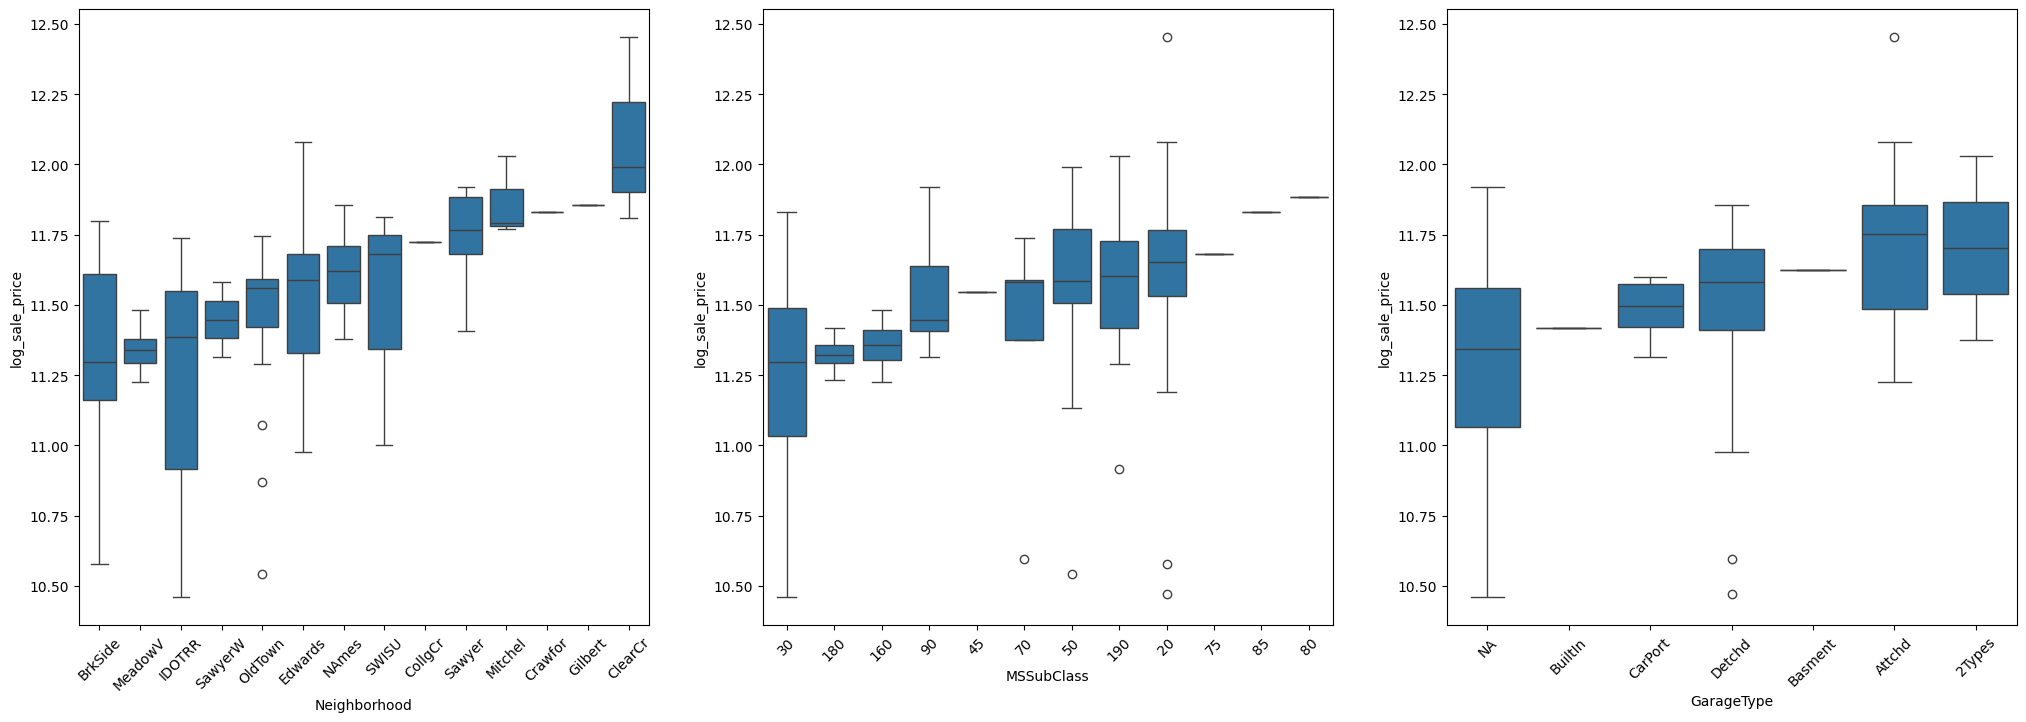

In [85]:
top_vars = ["Neighborhood", "MSSubClass", "GarageType"]

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

for i, var in enumerate(top_vars):
    medians = (
        df[df["has_low_qual"]]
        .groupby(var, observed=True)["SalePrice"]
        .median()
        .sort_values()
    )
    axes[i].tick_params(axis="x", rotation=45)
    sns.boxplot(
        data=df[df["has_low_qual"]],
        x=var,
        y="log_sale_price",
        order=medians.index,
        ax=axes[i],
    )
    print(df[df["has_low_qual"]][var].value_counts())


plt.show()